## Задание
<img src="ngeBrzSQhdo.jpg">

In [4]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#from urllib.request import urlretrieve
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import sys
#import os

# Enable inline plotting
%matplotlib nbagg
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
#print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.13.3
Pandas version 0.20.3
Matplotlib version 2.1.0


In [5]:
def fun(date, t,sigm,b,r):
    x = date[0]
    y = date[1]
    z = date[2]
    d = ((-x+y)*sigm,
         r*x-y-x*z,
         -b*z+x*y)         
    return vstack(d).ravel()

In [6]:
def var1():
    date0 = array([0.01 + 0.005*i,
                   0.01 + 0.005*i,
                   0.00])
    sigm = 10
    b = 8./3.
    r = 32 + i
    return date0,sigm,b,r


def var2():
    date0 = array([0.0 + 0.005*i,
                   0.0 + 0.005*i,
                   0.00])
    sigm = 10
    b = 8./3.
    r = 23 - i
    return date0,sigm,b,r


In [7]:
%%time

i = 1

begin,end = 0, 50.

t = linspace(begin,end, 10 ** 5)

date0,sigm,b,r = var1()
result1 = odeint(fun, date0, t, args=(sigm,b,r))

date0,sigm,b,r = var2()
result2 = odeint(fun, date0, t, args=(sigm,b,r))

Wall time: 518 ms


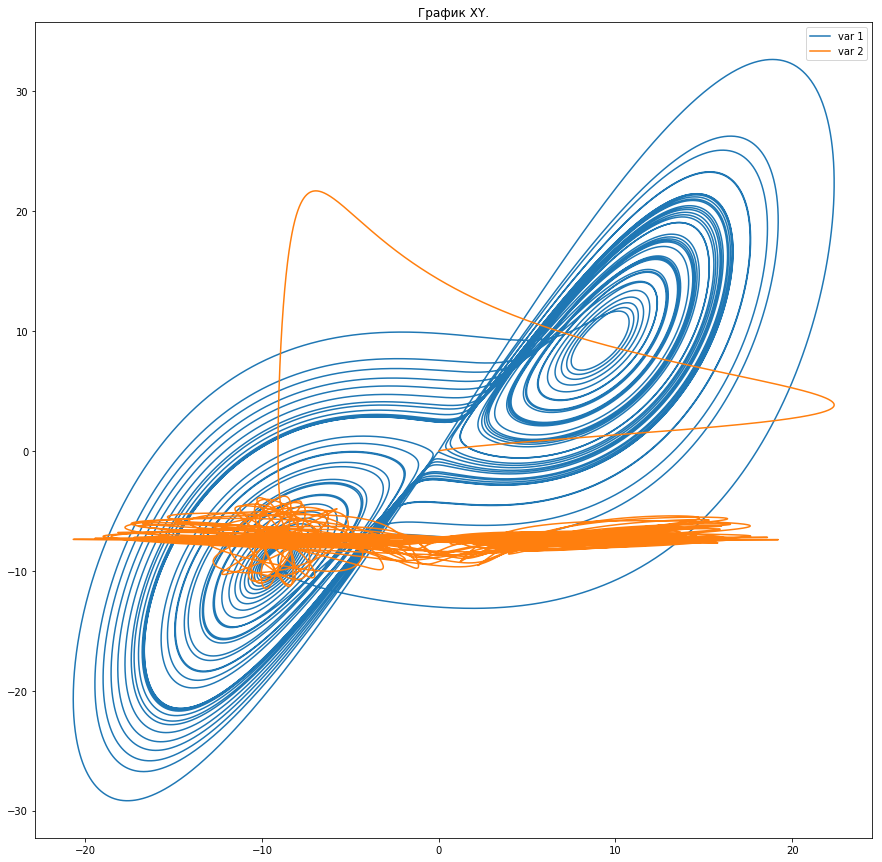

In [28]:
plt.figure(figsize=(15,15))

plt.title('График XY.'.format())
plt.plot([i[0] for i in result1] ,[i[1] for i in result1], label="var 1");
plt.plot([i[0] for i in result1] ,[i[1] for i in result2], label="var 2",);
plt.legend(('var 1', 'var 2'));

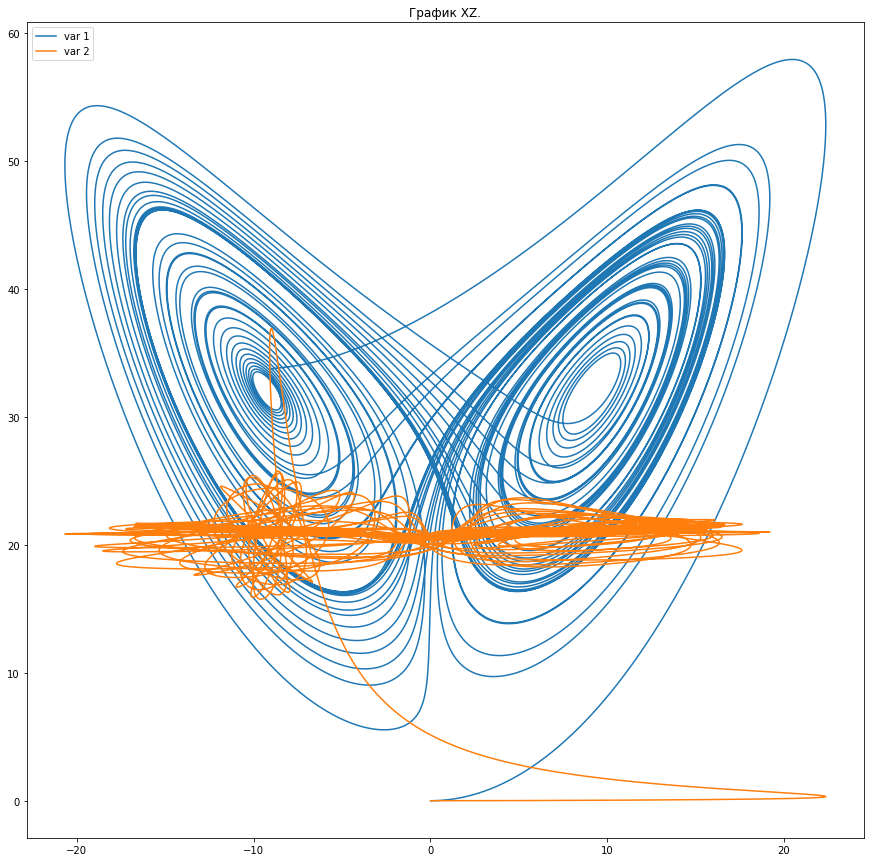

In [30]:
plt.figure(figsize=(15,15))

plt.title('График XZ.'.format())
plt.plot([i[0] for i in result1] ,[i[2] for i in result1], label="var 1");
plt.plot([i[0] for i in result1] ,[i[2] for i in result2], label="var 2",);
plt.legend(('var 1', 'var 2'));

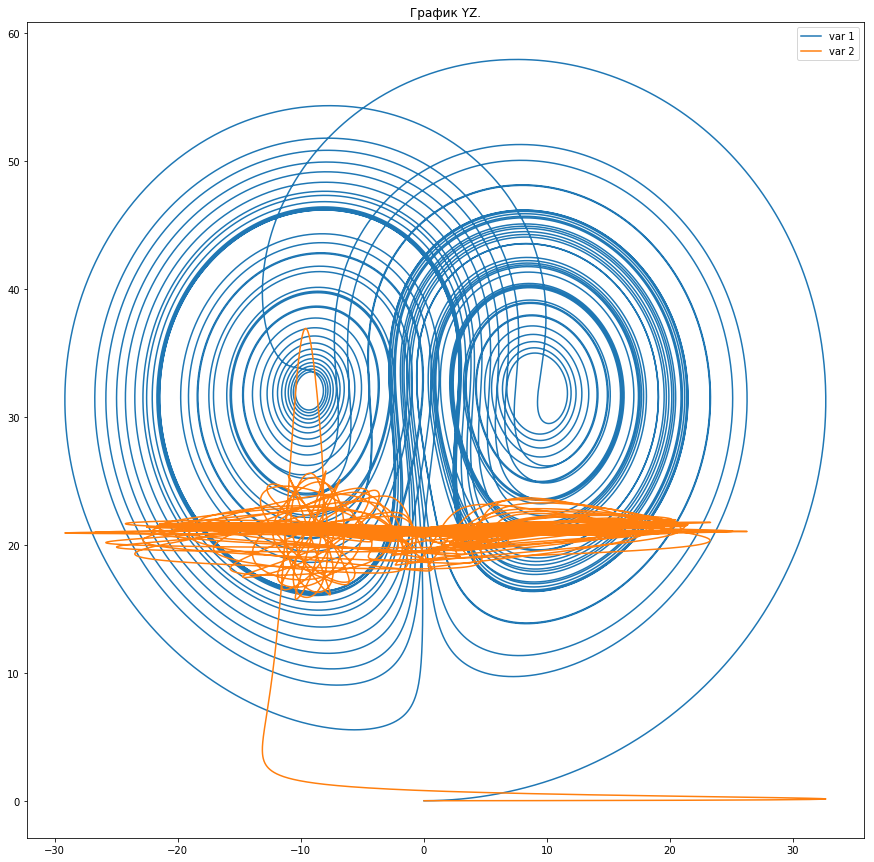

In [32]:
plt.figure(figsize=(15,15))

plt.title('График YZ.'.format())
plt.plot([i[1] for i in result1] ,[i[2] for i in result1], label="var 1");
plt.plot([i[1] for i in result1] ,[i[2] for i in result2], label="var 2",);
plt.legend(('var 1', 'var 2'));

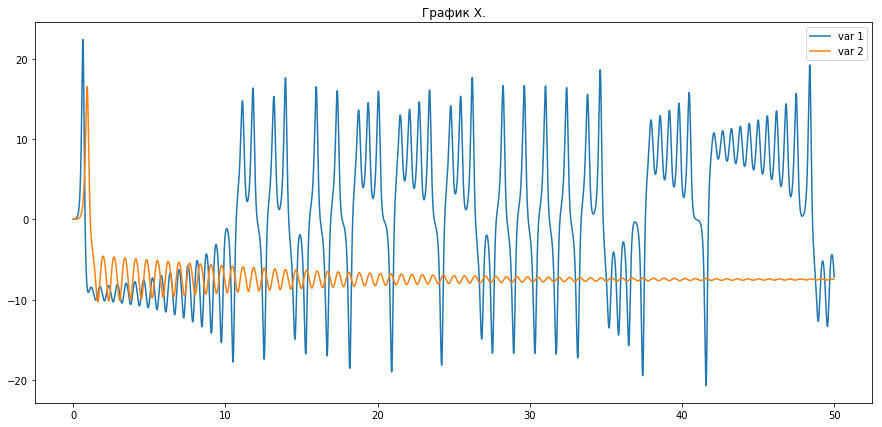

In [23]:
plt.figure(figsize=(15,7))

plt.title('График X.'.format())
plt.plot(t ,[i[0] for i in result1],t ,[i[0] for i in result2],);
plt.legend(('var 1', 'var 2'));

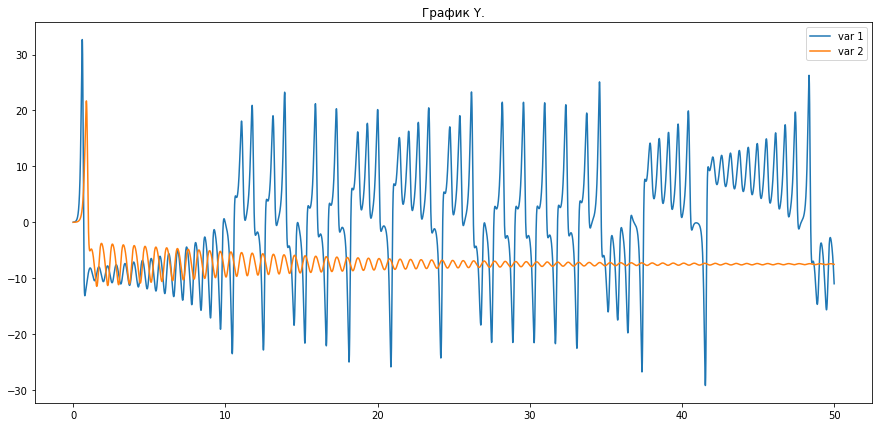

In [24]:
plt.figure(figsize=(15,7))

plt.title('График Y.'.format())
plt.plot(t ,[i[1] for i in result1],t ,[i[1] for i in result2],);
plt.legend(('var 1', 'var 2'));

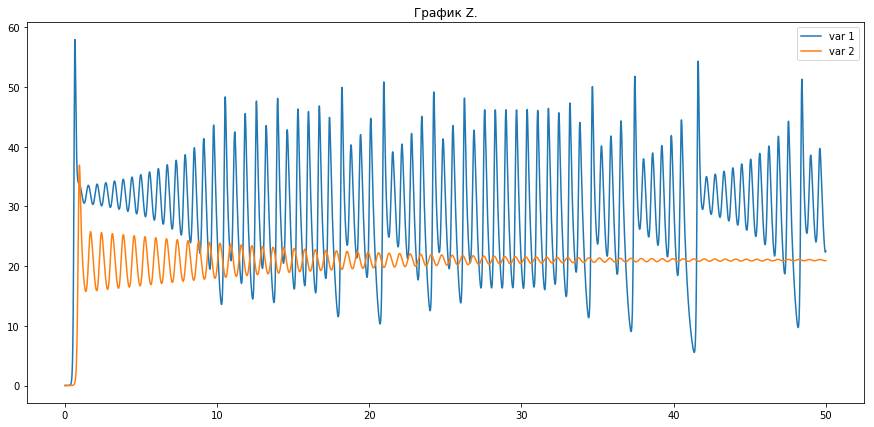

In [25]:
plt.figure(figsize=(15,7))

plt.title('График Z.'.format())
plt.plot(t ,[i[2] for i in result1],t ,[i[2] for i in result2],);
plt.legend(('var 1', 'var 2'));